## Ejemplo de dataframe con strings

In [2]:
import pandas as pd
import numpy as np

# Crear un DataFrame
entidades = [
    "Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Chiapas", 
    "Chihuahua", "Ciudad de México", "Coahuila", "Colima", "Durango", 
    "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "México", 
    "Michoacán", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", 
    "Puebla", "Querétaro", "Quintana Roo", "San Luis Potosí", "Sinaloa", 
    "Sonora", "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz", 
    "Yucatán", "Zacatecas"
]

np.random.seed(42)
data = {
    "Entidad Federativa": entidades,
    "Enero": np.random.randint(0, 100, len(entidades)),
    "Febrero": np.random.randint(0, 100, len(entidades)),
    "Marzo": np.random.randint(0, 100, len(entidades))
}

forzada_delitos = pd.DataFrame(data)

# Transformar el DataFrame a formato long
forzada_delitos_long = pd.melt(
    forzada_delitos,
    id_vars=['Entidad Federativa'],
    var_name='Mes',
    value_name='Delitos'
)

forzada_delitos_long


Entidad Federativa    Mes  Delitos
0        Aguascalientes  Enero       51
1       Baja California  Enero       92
2   Baja California Sur  Enero       14
3              Campeche  Enero       71
4               Chiapas  Enero       60
..                  ...    ...      ...
91           Tamaulipas  Marzo       77
92             Tlaxcala  Marzo       86
93             Veracruz  Marzo       61
94              Yucatán  Marzo       39
95            Zacatecas  Marzo       84

[96 rows x 3 columns]

## Ejemplo de dataframe con fechas

In [3]:
import pandas as pd
import numpy as np

# Generar un rango de fechas
fechas = pd.date_range(start="2025-01-01", end="2025-12-31", freq="ME")

# Crear un DataFrame con datos aleatorios
data = {
    'Fecha': np.random.choice(fechas, size=1000),  # Seleccionar 1000 fechas aleatorias
    'Desaparecidos': np.random.randint(0, 100, size=1000),
    'Localizados': np.random.randint(0, 100, size=1000),
    'No localizados': np.random.randint(0, 100, size=1000)
}

df_fechas = pd.DataFrame(data)

# Transformar el DataFrame a formato long
df_fechas_long = pd.melt(
    df_fechas,
    id_vars=['Fecha'],  # Usar las fechas como identificadores
    var_name='Clasificación',     # Nombre de la nueva columna que contendrá los nombres de las columnas originales
    value_name='Cantidad'  # Nombre de la nueva columna que contendrá los valores
)

df_fechas_long = df_fechas_long.drop_duplicates()

df_fechas_long = df_fechas_long.fillna(0)

df_fechas_long = df_fechas_long.groupby(['Fecha', 'Clasificación'], as_index=False)['Cantidad'].sum()

df_fechas_long

Fecha   Clasificación  Cantidad
0  2025-01-31   Desaparecidos      3428
1  2025-01-31     Localizados      3284
2  2025-01-31  No localizados      3494
3  2025-02-28   Desaparecidos      2280
4  2025-02-28     Localizados      2277
5  2025-02-28  No localizados      2376
6  2025-03-31   Desaparecidos      2855
7  2025-03-31     Localizados      3381
8  2025-03-31  No localizados      3240
9  2025-04-30   Desaparecidos      2342
10 2025-04-30     Localizados      2329
11 2025-04-30  No localizados      2556
12 2025-05-31   Desaparecidos      3219
13 2025-05-31     Localizados      2574
14 2025-05-31  No localizados      3017
15 2025-06-30   Desaparecidos      2741
16 2025-06-30     Localizados      2704
17 2025-06-30  No localizados      2494
18 2025-07-31   Desaparecidos      2526
19 2025-07-31     Localizados      2509
20 2025-07-31  No localizados      2757
21 2025-08-31   Desaparecidos      3047
22 2025-08-31     Localizados      2756
23 2025-08-31  No localizados      2478
24 2025-09-30   Desaparecidos      2637
25 2025-09-30     Localizados      2709
26 2025-09-30  No localizados      2466
27 2025-10-31   Desaparecidos      3183
28 2025-10-31     Localizados      2968
29 2025-10-31  No localizados      2803
30 2025-11-30   Desaparecidos      2844
31 2025-11-30     Localizados      2176
32 2025-11-30  No localizados      2444
33 2025-12-31   Desaparecidos      3629
34 2025-12-31     Localizados      3146
35 2025-12-31  No localizados      2901

## Código a copiar:

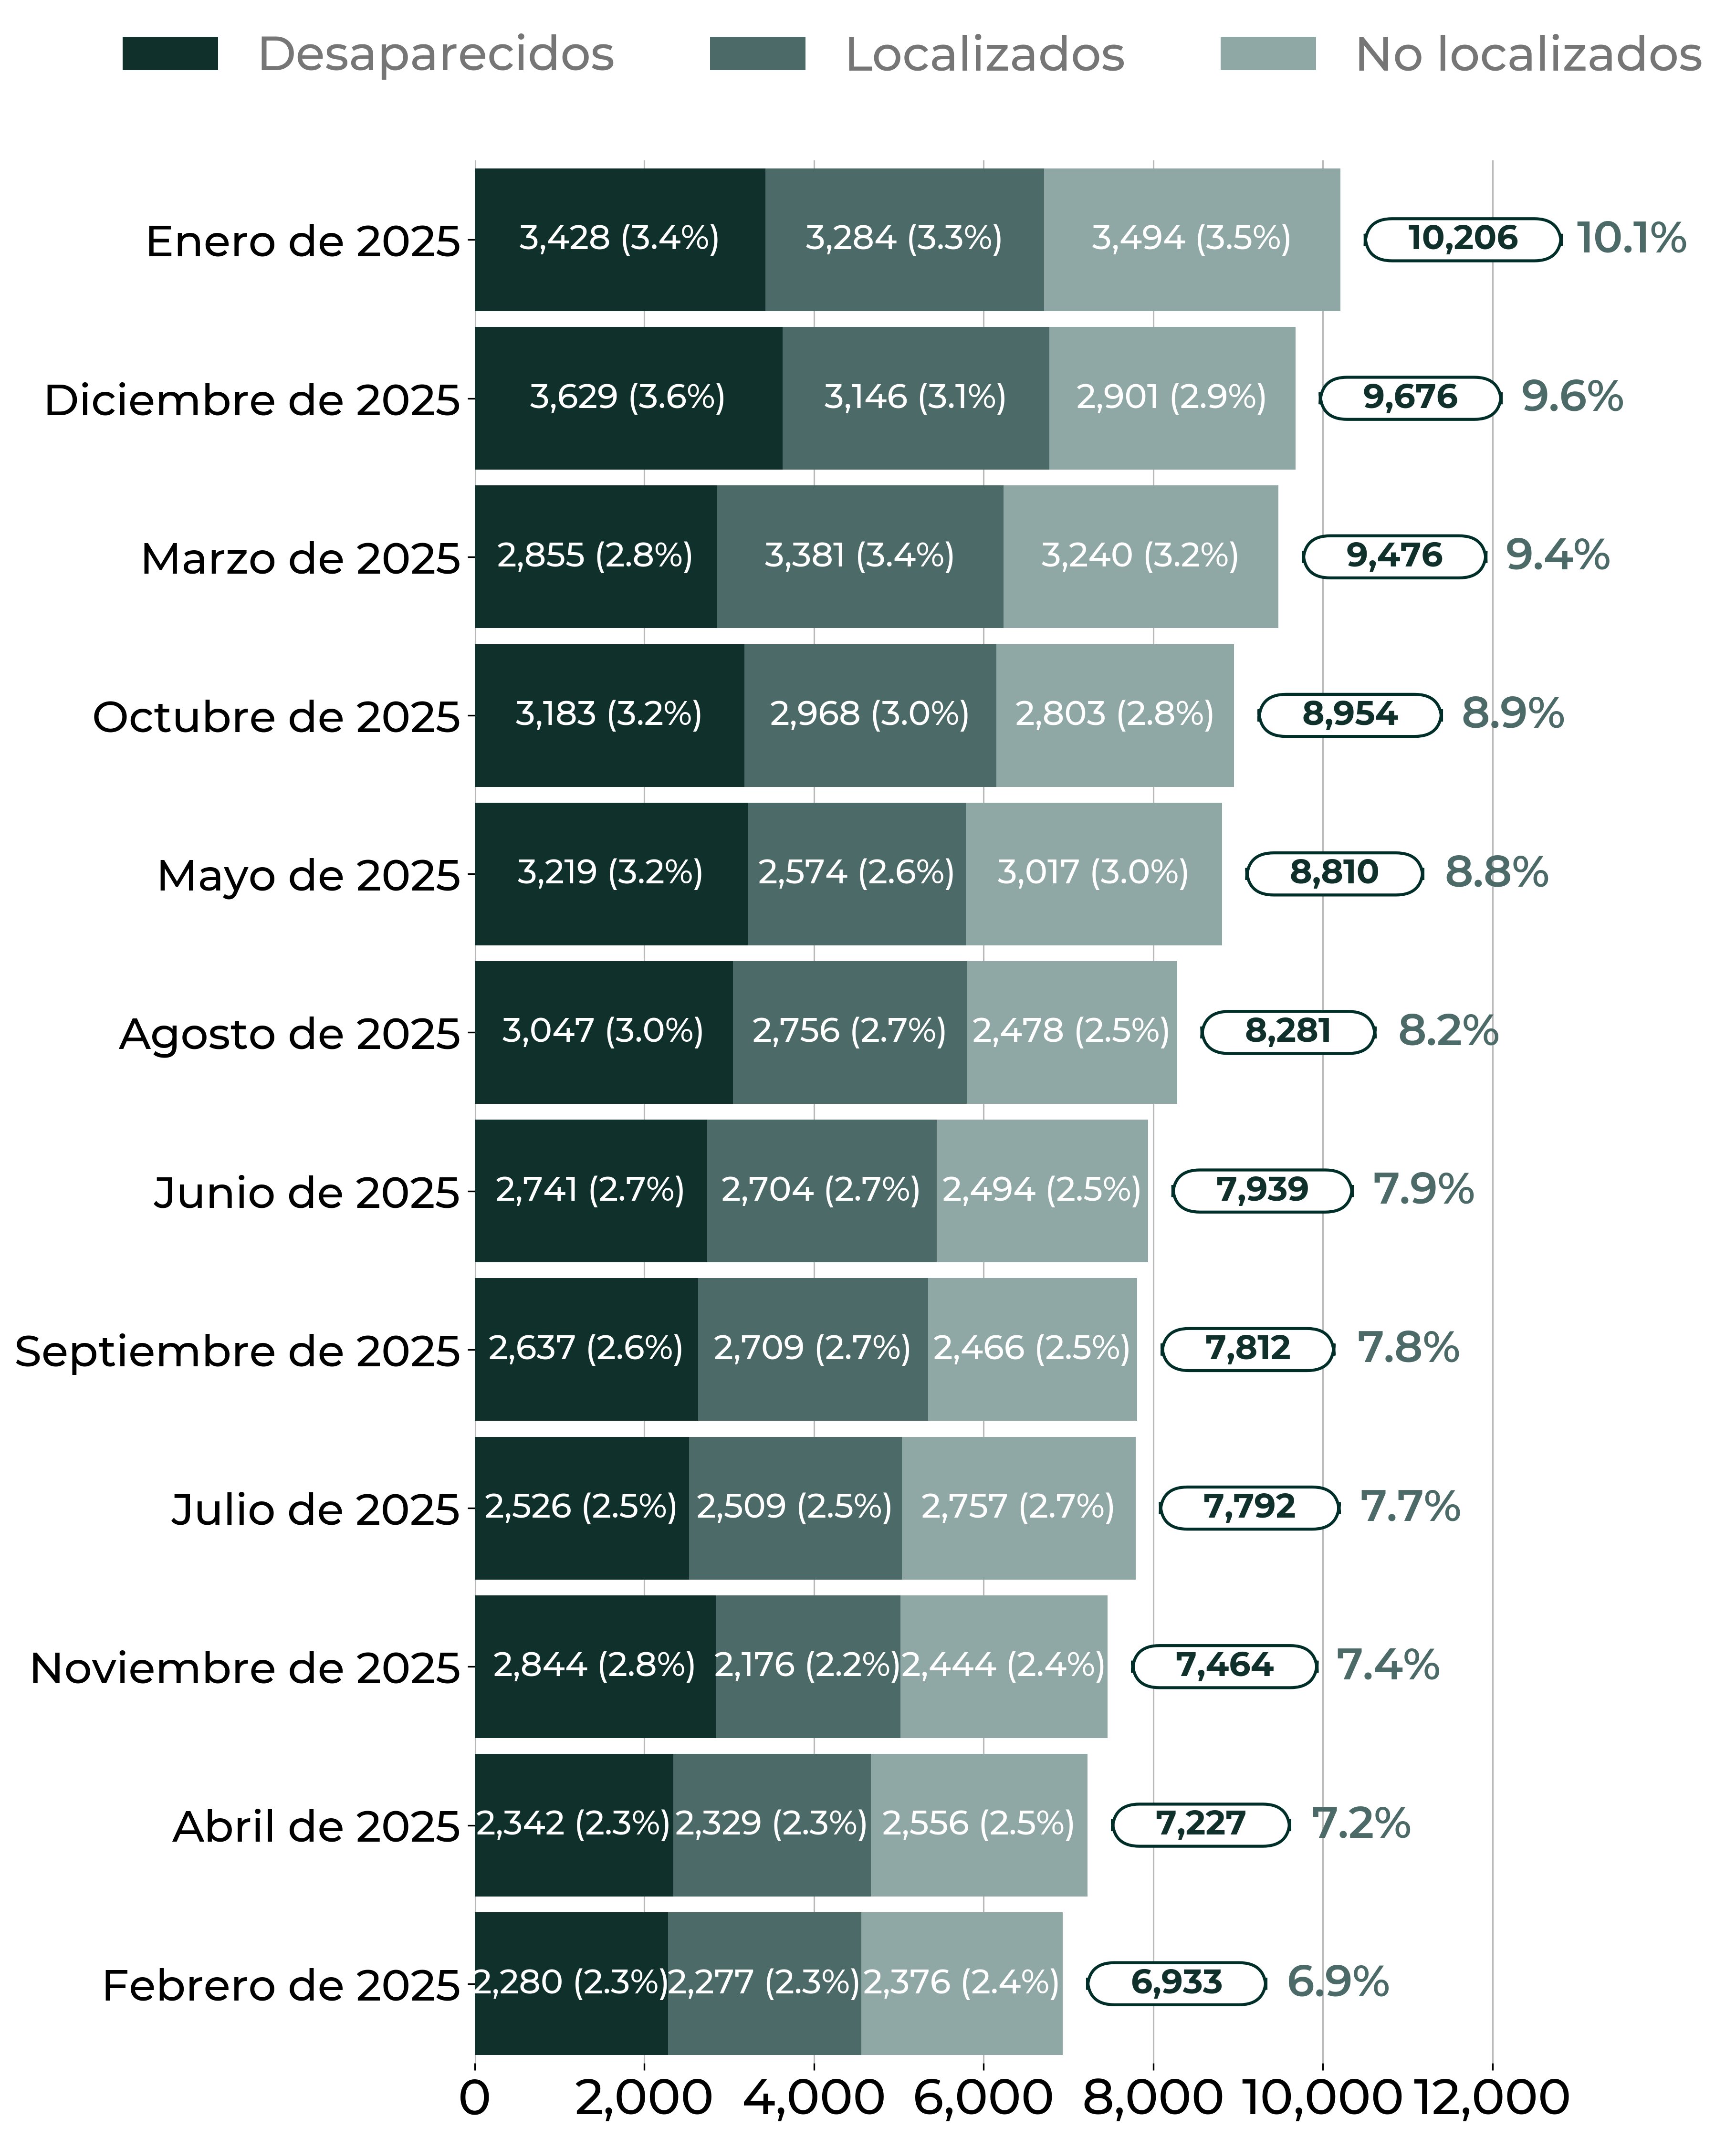

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from statistics import mode

def barras_apiladas(
    df_long, 
    bar_height=0.5, 
    nombre=None,
    font = 'Montserrat',
    fontsize_barra = 15, 
    valor_barra=False, 
    porcentaje_barra=False, 
    porcentaje_total=False, 
    orientacion='horizontal'
):
    # Configuración de la fuente
    font_config = {
        'family': font,
        'variable_x': {'size': 25, 'weight': 'medium', 'color': '#000000'},
        'variable_y': {'size': 22, 'weight': 'medium', 'color': '#000000'},
        'valor_capsula': {'size': fontsize_barra, 'weight': 'bold', 'color': '#10302C'},
        'valor_porcentaje_barra': {'size': fontsize_barra, 'weight': 'medium', 'color': '#ffffff'},
        'porcentaje_total': {'size': 22, 'weight': 'semibold', 'color': '#4C6A67'},
        'leyenda': {'size': 24, 'weight': 'medium', 'color': '#767676'}
    }

    plt.rcParams['svg.fonttype'] = 'none'
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    nombre_df = nombre or "barras_apiladas"

    colores_asignados = ["#10302C", "#4C6A67", "#8FA8A6", "#A3C9A8"]

    # Pivotear el DataFrame y calcular totales
    df_pivot = df_long.pivot(index=df_long.columns[0], columns=df_long.columns[1], values=df_long.columns[2]).fillna(0)
    suma_total = df_pivot.sum(axis=1).sort_values(ascending=False)
    df_pivot = df_pivot.loc[suma_total.index]
    total_general = suma_total.sum()

    # Convertir las fechas al formato deseado
    meses = {
        1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
        7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
    }

    entidades = df_pivot.index.values
    if hasattr(df_pivot.index, "dtype") and str(df_pivot.index.dtype).startswith("datetime"):
        entidades_formateadas = [f"{meses[pd.Timestamp(date).month]} de {pd.Timestamp(date).year}" for date in entidades]
    else:
        entidades_formateadas = entidades

    valores = [df_pivot[col].values for col in df_pivot.columns]
    categorias = df_pivot.columns
    posiciones = np.arange(len(entidades))

    # --- Ajuste del ancho de la figura según el ancho de las cápsulas ---
    if orientacion == 'vertical':
        longitudes = []
        for total_valor in suma_total:
            texto_capsula = f"    {int(total_valor):,}    "
            longitudes.append(len(texto_capsula))
        if longitudes:
            moda_capsula_len = mode(longitudes)
        else:
            moda_capsula_len = 10  # valor por defecto si la lista está vacía
        extra_width = moda_capsula_len * 0.1  # Ajusta este factor si lo necesitas
        base_width = max(12, len(entidades)*extra_width)
        fig_width = base_width 
        fig, ax = plt.subplots(figsize=(fig_width, 8), dpi=300)
    else:
        fig, ax = plt.subplots(figsize=(12, 15), dpi=300)
    # ---------------------------------------------------------------

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    x_max = suma_total.max() * 1.15

    # Ajustar los márgenes
    if orientacion == 'horizontal':
        ax.set_ylim(-0.5, len(entidades) - 0.5)
    else:
        ax.set_xlim(-0.5, len(entidades) - 0.5)

    # Dibujar barras apiladas
    for pos, entidad, total_valor in zip(posiciones, entidades, suma_total):
        left = 0
        for i, valor in enumerate(valores):
            color = colores_asignados[i % len(colores_asignados)]
            if orientacion == 'horizontal':
                if valor[pos] > 0:
                    ax.barh(pos, valor[pos], height=bar_height, left=left, color=color, edgecolor='none', zorder=2, label=categorias[i] if pos == 0 else None)
                    # Texto dentro de la barra
                    if porcentaje_barra or valor_barra:
                        texto = f"{valor[pos]:,.0f}" if valor_barra else ""
                        if porcentaje_barra:
                            porcentaje_valor = (valor[pos] / total_general) * 100
                            texto += f" ({porcentaje_valor:.1f}%)" if valor_barra else f"{porcentaje_valor:.1f}%"
                        ax.text(left + valor[pos] / 2, pos, texto, va='center', ha='center',
                                fontsize=font_config['valor_porcentaje_barra']['size'],
                                fontfamily=font_config['family'],
                                fontweight=font_config['valor_porcentaje_barra']['weight'],
                                color=font_config['valor_porcentaje_barra']['color'])
                left += valor[pos]
            else:
                if valor[pos] > 0:
                    ax.bar(pos, valor[pos], width=bar_height, bottom=left, color=color, edgecolor='none', zorder=2, label=categorias[i] if pos == 0 else None)
                    # Texto dentro de la barra
                    if porcentaje_barra or valor_barra:
                        texto = f"{valor[pos]:,.0f}" if valor_barra else ""
                        if porcentaje_barra:
                            porcentaje_valor = (valor[pos] / total_general) * 100
                            texto += f" ({porcentaje_valor:.1f}%)" if valor_barra else f"{porcentaje_valor:.1f}%"
                        ax.text(pos, left + valor[pos] / 2, texto, va='center', ha='center',
                                fontsize=font_config['valor_porcentaje_barra']['size'],
                                fontfamily=font_config['family'],
                                fontweight=font_config['valor_porcentaje_barra']['weight'],
                                color=font_config['valor_porcentaje_barra']['color'])
                left += valor[pos]


        if orientacion == 'horizontal':
            texto_capsula = f"    {int(total_valor):,}    "
            t = ax.text(total_valor + x_max * 0.03, pos, texto_capsula,
                    bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor='white', edgecolor='#002F2A', linewidth=1.5),
                    ha='left', va='center',
                    fontsize=font_config['valor_capsula']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['valor_capsula']['weight'],
                    color=font_config['valor_capsula']['color'])
        else:
            texto_capsula = f"  {int(total_valor):,}  "
            t = ax.text(pos, total_valor + x_max * 0.03, texto_capsula,
                    bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor='white', edgecolor='#002F2A', linewidth=1.5),
                    ha='center', va='bottom',
                    fontsize=font_config['valor_capsula']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['valor_capsula']['weight'],
                    color=font_config['valor_capsula']['color'])

        # Calcular el ancho de la cápsula en coordenadas de datos
        fig.canvas.draw()
        renderer = fig.canvas.get_renderer()
        bbox = t.get_window_extent(renderer=renderer)
        inv = ax.transData.inverted()
        bbox_data = inv.transform([[bbox.x0, bbox.y0], [bbox.x1, bbox.y1]])
        if orientacion == 'horizontal':
            ancho_capsula = bbox_data[1][0] - bbox_data[0][0]
        else:
            ancho_capsula = bbox_data[1][1] - bbox_data[0][1]

        # Mostrar porcentaje total al lado derecho de la cápsula
        if porcentaje_total:
            porcentaje = round((total_valor / total_general) * 100, 1)
            if orientacion == 'horizontal':
                ax.text(total_valor + x_max * 0.1 + ancho_capsula + x_max * 0.01, pos, f"{porcentaje}%",
                        ha='left', va='center',
                        fontsize=font_config['porcentaje_total']['size'],
                        fontfamily=font_config['family'],
                        fontweight=font_config['porcentaje_total']['weight'],
                        color=font_config['porcentaje_total']['color'])
            else:
                ax.text(pos, total_valor + x_max * 0.1 + ancho_capsula + x_max * 0.01, f"{porcentaje}%",
                        ha='center', va='bottom',
                        fontsize=font_config['porcentaje_total']['size'],
                        fontfamily=font_config['family'],
                        fontweight=font_config['porcentaje_total']['weight'],
                        color=font_config['porcentaje_total']['color'])

    # Configurar ejes y etiquetas
    if orientacion == 'horizontal':
        ax.set_yticks(posiciones)
        ax.set_yticklabels(entidades_formateadas, fontsize=font_config['variable_y']['size'], fontweight=font_config['variable_y']['weight'], fontfamily=font_config['family'])
        ax.invert_yaxis()
        ax.set_xlim(0, 1.1 * x_max)
        ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.setp(ax.get_xticklabels(),
                 fontsize=font_config['variable_x']['size'],
                 fontweight=font_config['variable_x']['weight'],
                 fontfamily=font_config['family'],
                 color=font_config['variable_x']['color'])
        ax.grid(visible=True, axis='x', color='#B9B9B9', linewidth=0.75, linestyle='-')
    else:
        ax.set_xticks(posiciones)
        ax.set_xticklabels(entidades_formateadas, fontsize=font_config['variable_x']['size'], fontweight=font_config['variable_x']['weight'], fontfamily=font_config['family'], rotation=45, ha='right')
        ax.set_ylim(0, 1.1 * x_max)
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.setp(ax.get_yticklabels(),
                 fontsize=font_config['variable_y']['size'],
                 fontweight=font_config['variable_y']['weight'],
                 fontfamily=font_config['family'],
                 color=font_config['variable_y']['color'])
        ax.grid(visible=True, axis='y', color='#B9B9B9', linewidth=0.75, linestyle='-')

    # Quitar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Leyenda
    ax.legend(fontsize=font_config['leyenda']['size'], loc='lower center', bbox_to_anchor=(0.4, 1.02), ncol=len(df_pivot.columns), frameon=False,
              prop=font_manager.FontProperties(family=font_config['family'], size=font_config['leyenda']['size'], weight=font_config['leyenda']['weight']),
              labelcolor=font_config['leyenda']['color'])

    plt.tight_layout()
    plt.savefig(f"{nombre_df}.svg", format='svg', bbox_inches='tight', dpi=300)
    plt.savefig(f"{nombre_df}.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()

barras_apiladas(df_fechas_long, 
                nombre="df_fechas_long_horizontal", 
                bar_height=0.9, 
                fontsize_barra=17,
                valor_barra=True, 
                porcentaje_barra=True, 
                porcentaje_total=True,
                orientacion='horizontal'
                )

## Otros ejemplos de uso:

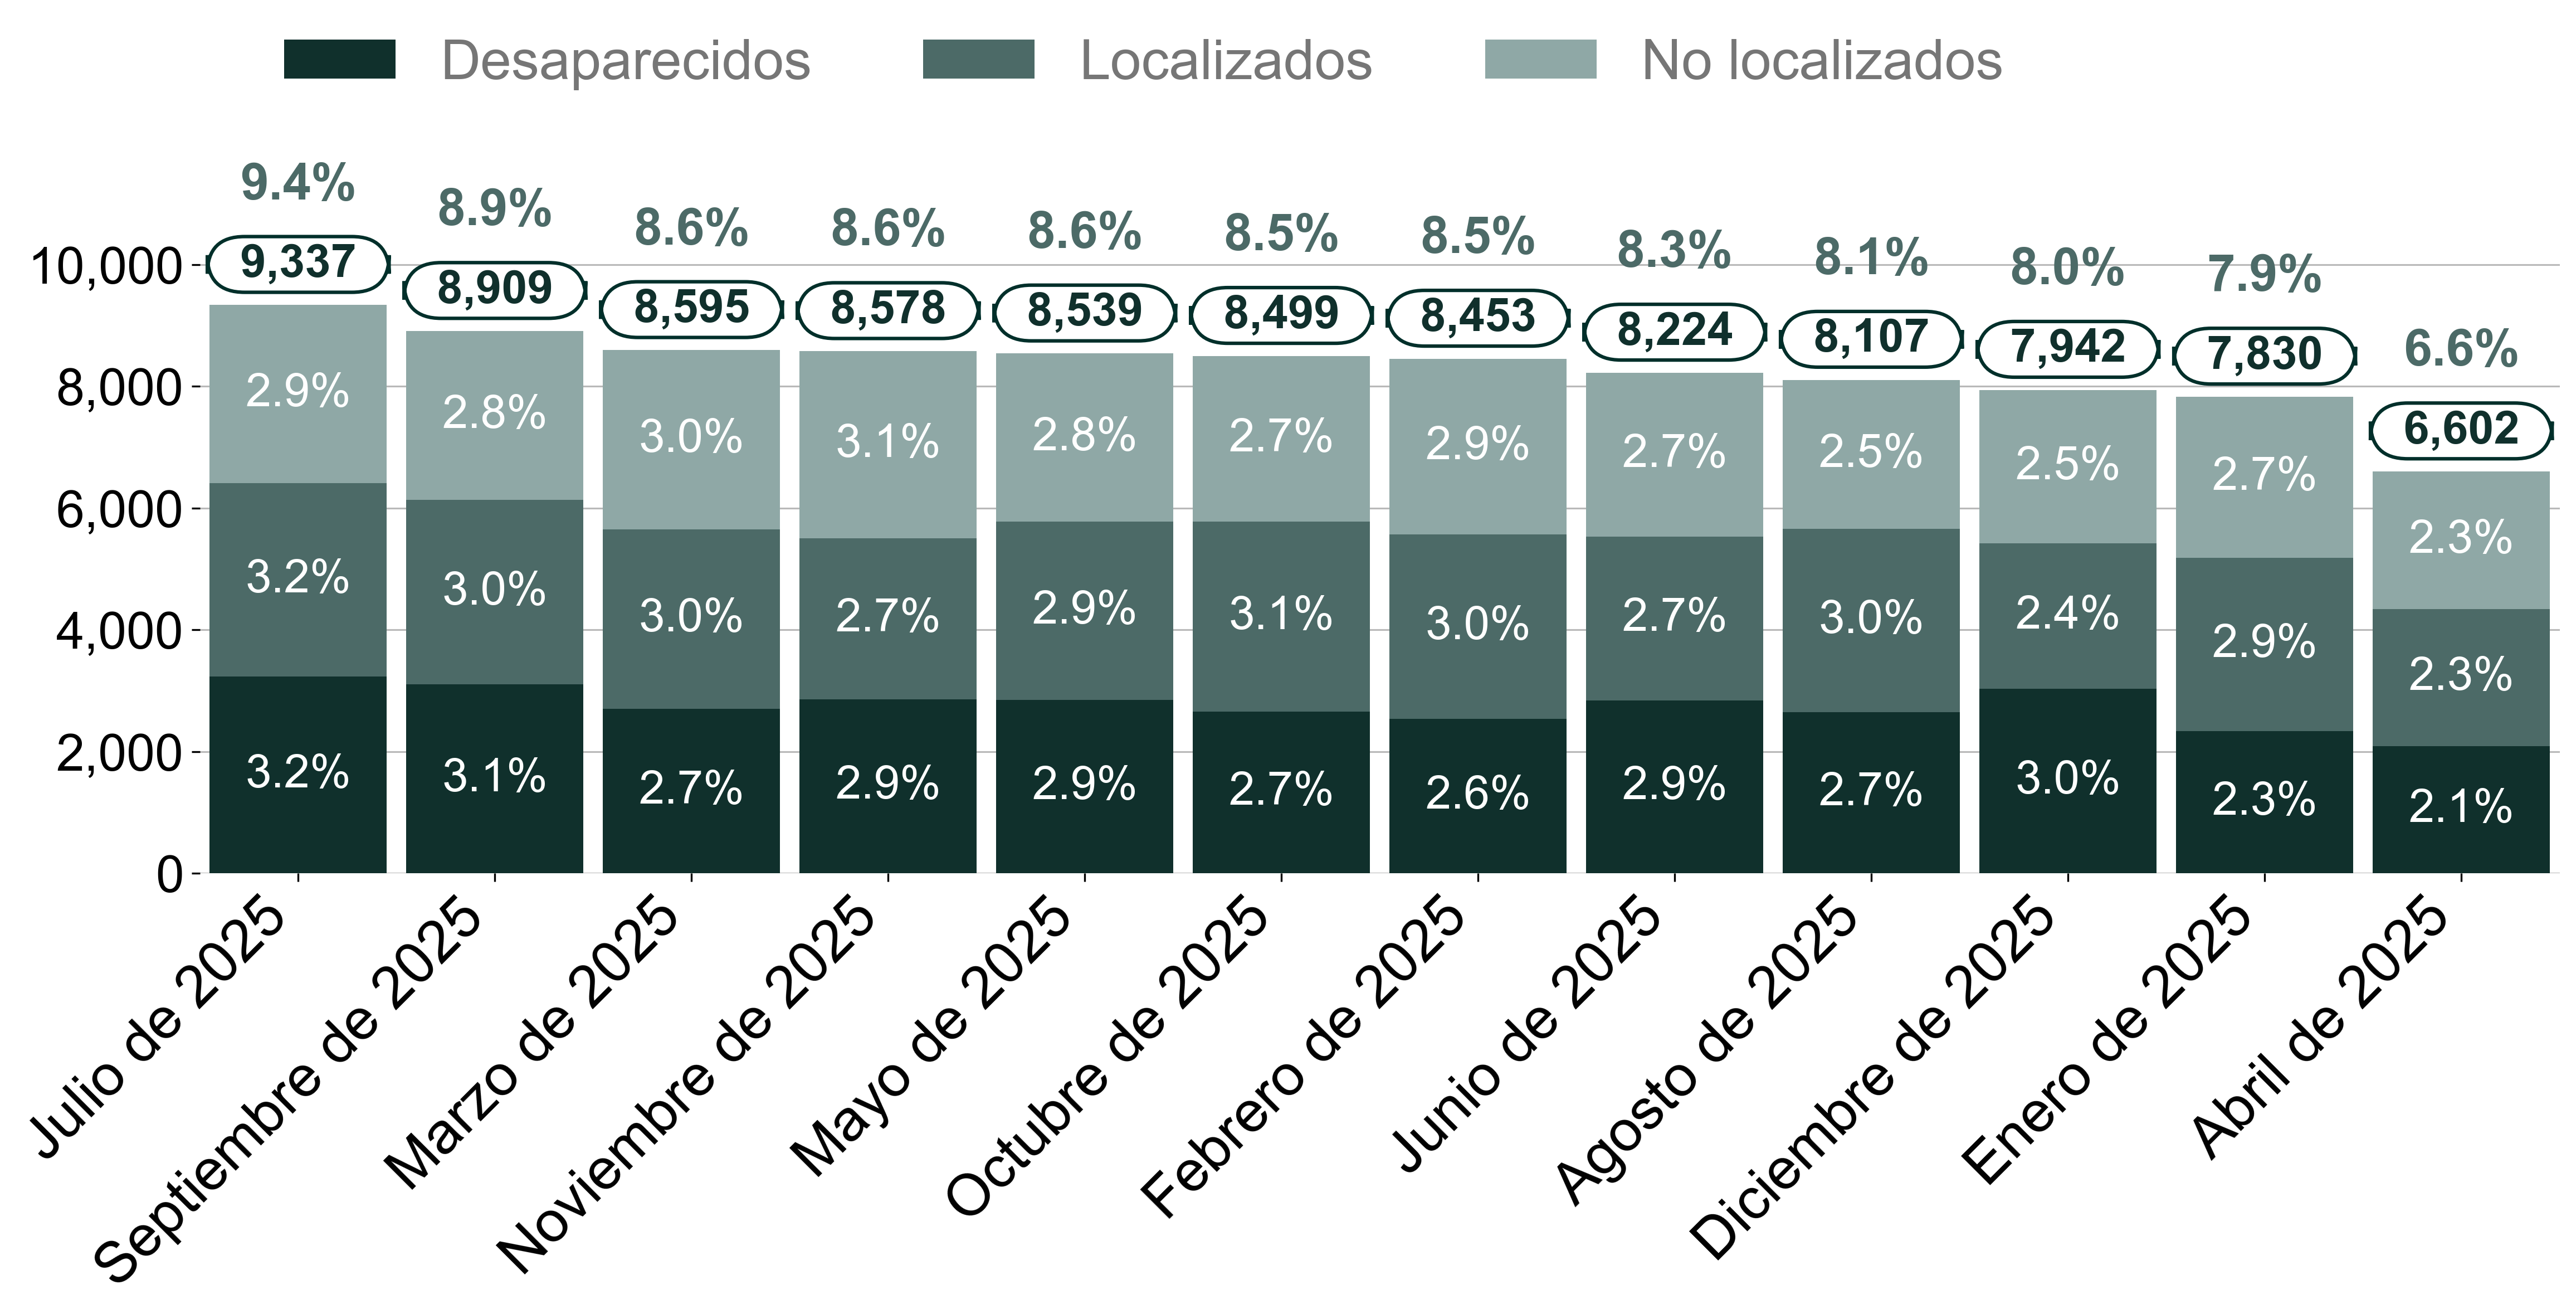

In [4]:
barras_apiladas(df_fechas_long, 
                nombre="df_fechas_long_vertical", 
                bar_height=0.9, 
                font='Arial',
                fontsize_barra=20,
                valor_barra=False, 
                porcentaje_barra=True, 
                porcentaje_total=True,
                orientacion='vertical'
                )

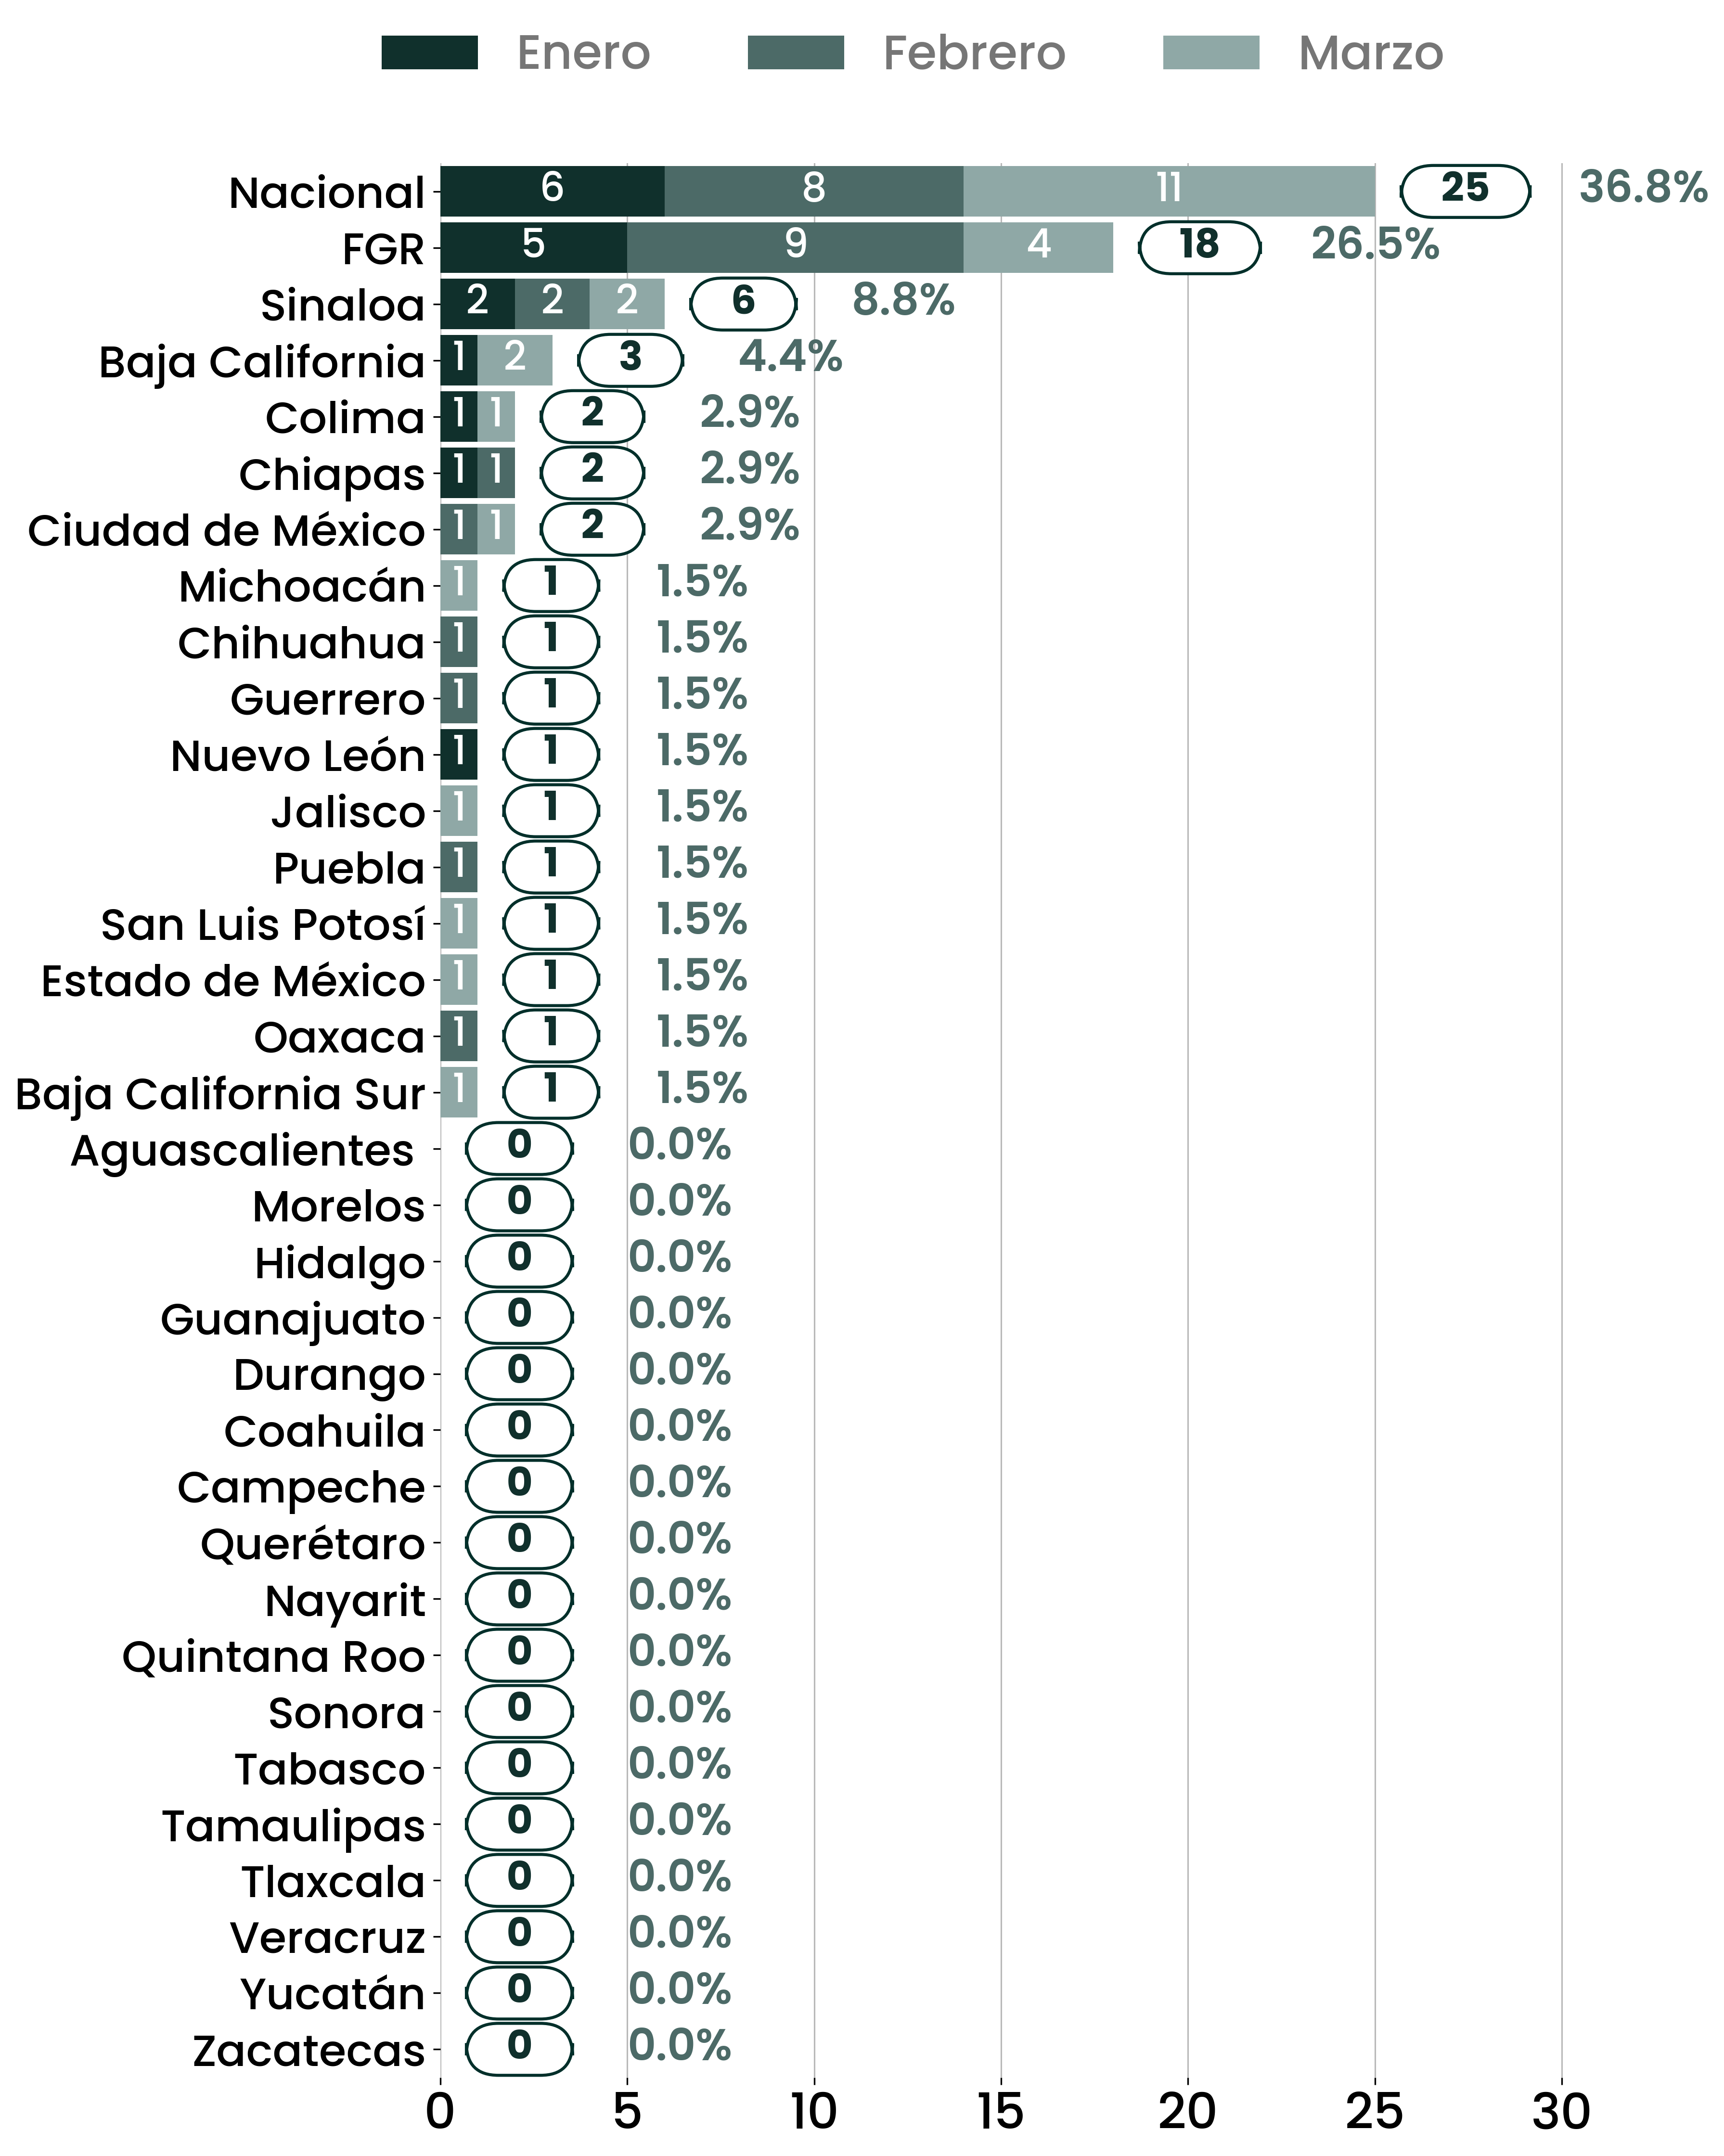

In [5]:
barras_apiladas(forzada_delitos_long, 
                nombre="forzada_delitos_long_horizontal", 
                bar_height=0.9, 
                font='Poppins',
                valor_barra=True, 
                fontsize_barra=20,
                porcentaje_barra=False, 
                porcentaje_total=True,
                orientacion='horizontal'
                )

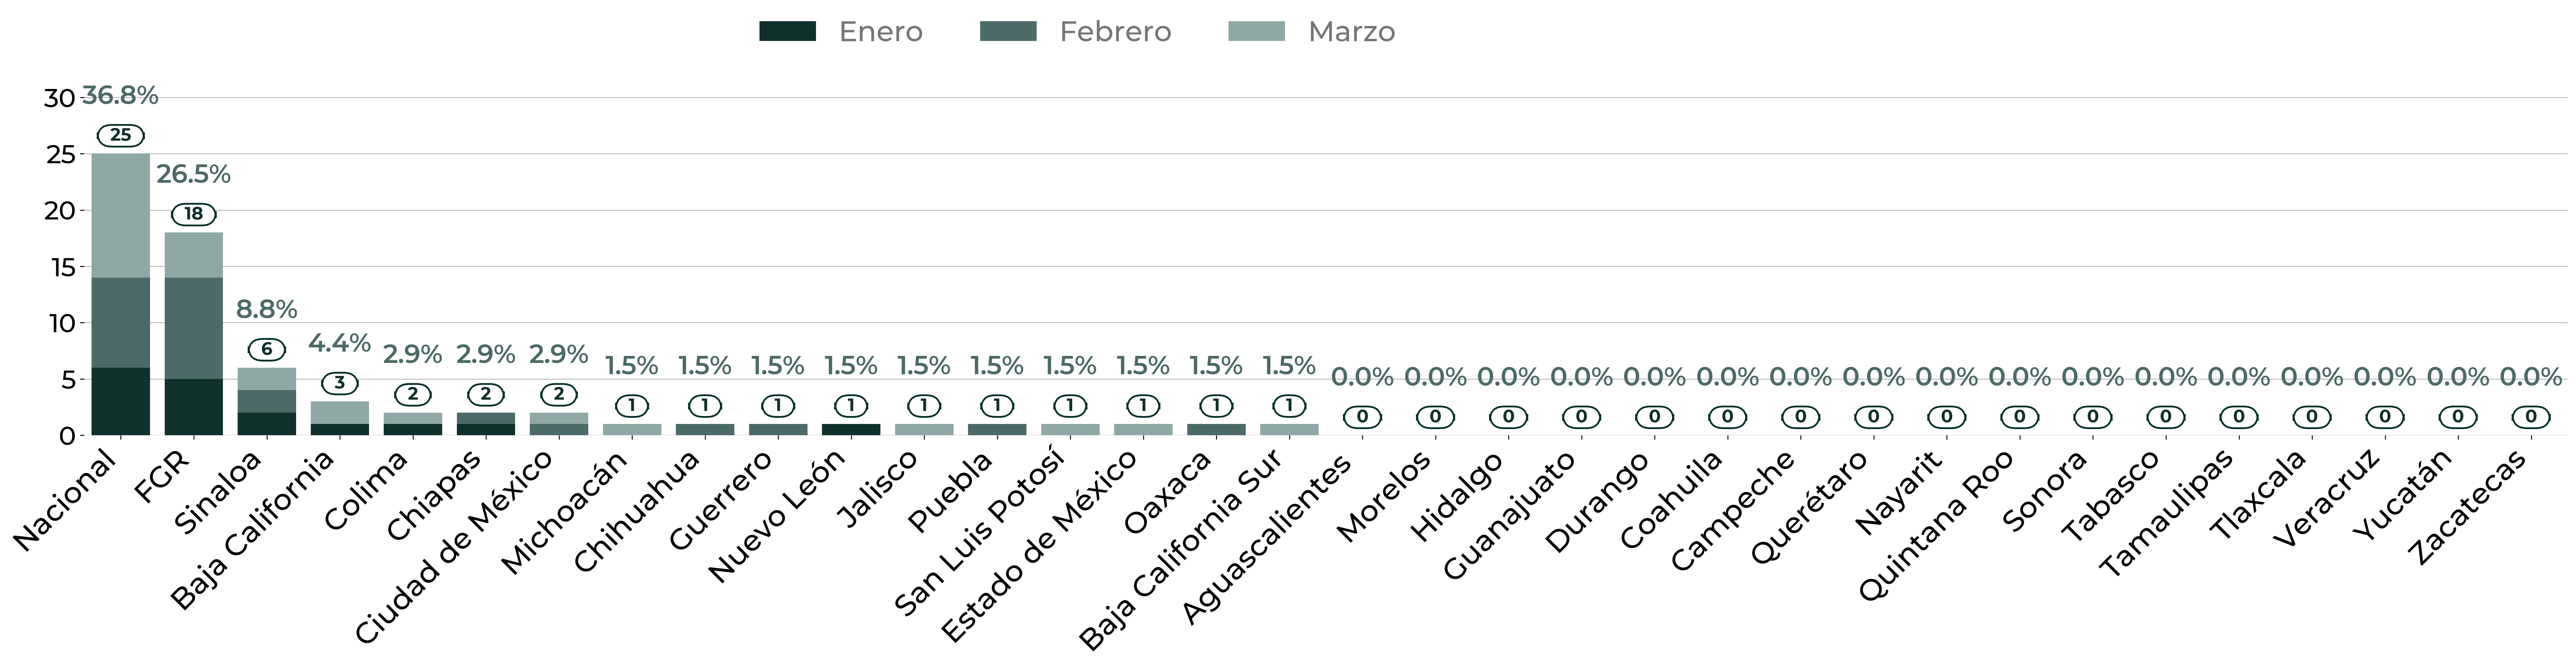

In [7]:
barras_apiladas(forzada_delitos_long, 
                nombre="forzada_delitos_long_vertical", 
                bar_height=0.8, 
                font='Montserrat',
                valor_barra=False, 
                porcentaje_barra=False, 
                porcentaje_total=True,
                orientacion='vertical'
                )